# Dynamic voting

Let us now move on to simple models with dynamic voting. We will start out with a model by Hassler, Rodriguez Mora, Storesletten and Zilibotti, which looks into the effects of the Welfare state from 1929. 

The key findings are as follows:

- The welfare state can regenerate its own political constituency, leading to a pattern
of persistence, because of dynamic linkages. In particular, redistributive policies
create their own constituency.
- But, the welfare state can also breakdown as an equilibrium phenomenon, thus an
equilibrium with the welfare state is potentially fragile.
An auxiliary implication:
- An increase in (technological) wage inequality can undermine the support for the
welfare state.

## The model

- It is assumed that there are three groups the young which are born all equal. The old that can be might be "successful" (type $S$) or "unsuccessful" (type $U$).
- The young individual can influence the success with an investment $e$ of cost $e^2$. The probability of being successful is $p(e) = e$ and then he earns $1$ unit. If he is unsuccessful (with probability $1-e$), he earns $0$. 
- At each period a transfer towards the unsuccessful is made. The transfer is $b\in (0,1)$ is made. This transfer is financed by lump-sum $\tau$. The transfer and the associated tax rate are made before the young decide on their investment.

We can then write down the utility functions as:
- Utility of old successful: $U^{OS}_t = 1 - \tau_t$.
- Utility of old unsuccessful: $U^{OU}_t = b_t - \tau_t$.
- Utility of young people: $U^{y}_t = e_t(1+\beta) + (1-e_t)(b_t + \beta b_{t+1})-e_t^2-\tau_t-\beta \tau_{t+1}$.

The optimal investment strategy is:

$$
    e^*_t = \frac{1+ \beta - (b_t + \beta b_{t+1})}{2}
$$

This allows to calculate the fraction of old and unsuccessful people to be:
$$
    u_{t+1} = 1 - e^*_t = \frac{1- \beta + (b_t + \beta b_{t+1})}{2}
$$

The budget constraint is:
$$
    2\tau_t = \left(u_{t+1} + u_t\right)b_t
$$

We can now have a look what happens if only the old people vote.


````{prf:definition} Dictatorship
Let us refer to a situation in which only one type of old agents
have political power as a “dictatorship”. Therefore, there can be two types of dictatorships:
-  Dictatorship of proletariat (DP), where the unsuccessful agents have all the political
power.
-  Plutocracy (PL), where the successful agents have old optical power.
````

In case of a plutocracy, the situation is quite simple as $b_t = 0$ and hence
$$
u_t = \frac{1-\beta}{2}
$$

In case of the dictatorship of the proletariat, the situation is substantially more complicated. There are actually three outcomes:

- $u_{t+1} =\frac{5}{4} - \frac{U_t}{2}$ if $u_t > \tilde{u}(\beta) = \frac{\beta+6-\beta\sqrt{4-2\beta}}{2(2+\beta)}$
- $u_{t+1} = u^{dp} - \frac{1}{2}\left(u_t-u^{dp}\right)$ with $u^{dp} = \frac{1}{6}\left(5 + \frac{\beta^2}{2+\beta}\right)$ if $u_t \in \left[\frac{3}{2}- \frac{2}{2+\beta},\tilde{u}(\beta)\right)]$
- $u_{t+1} =\frac{\beta}{4} +\frac{2}{2+\beta}$ otherwise

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, '$\\beta$')

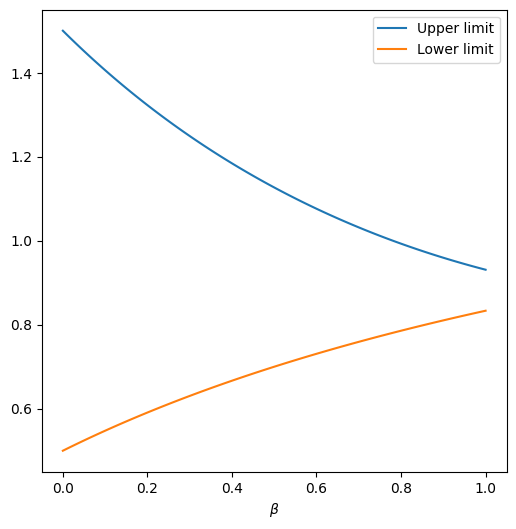

In [8]:
beta = np.linspace(0,1,100)
utbeta = (beta+6-beta*np.sqrt(4-2*beta))/(2*(2+beta))

lower_lim = 3/2 - 2/(2+beta)
f, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(beta,utbeta, label='Upper limit')
ax.plot(beta, lower_lim, label='Lower limit')
ax.legend()
ax.set_xlabel(r'$\beta$')

In [20]:
def utp(u_t:float, beta:float):
    utbeta = (beta+6-beta*np.sqrt(4-2*beta))/(2*(2+beta))
    lower_lim = 3/2 - 2/(2+beta)
    if u_t > utbeta:
        return 5/4 - u_t/2
    if u_t > lower_lim:
        u_dp = 1/6*(5 + beta**2/(2+beta))
        return u_dp - 1/2*(u_t-u_dp)
    return beta/4 + 2/(2+beta)

Text(0, 0.5, '$u_{t+1}$')

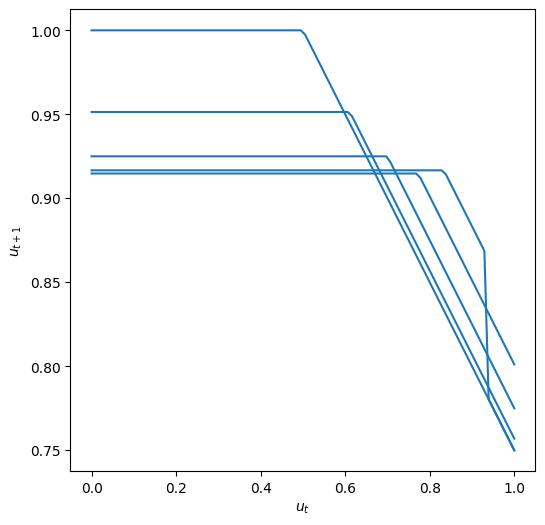

In [15]:
betas = np.linspace(0,1,5)

uts = np.linspace(0,1,100)
f, ax = plt.subplots(1,1,figsize=(6,6))
for beta in betas:
    utps = [utp(ut,beta) for ut in uts]
    ax.plot(uts,utps, color="C0")

ax.set_xlabel(r'$u_t$')
ax.set_ylabel(r'$u_{t+1}$')

So we can see that there is some evolution in the fraction of unsuccessful people. Let us assume that there are initially only unsuccessful people. What happens then?

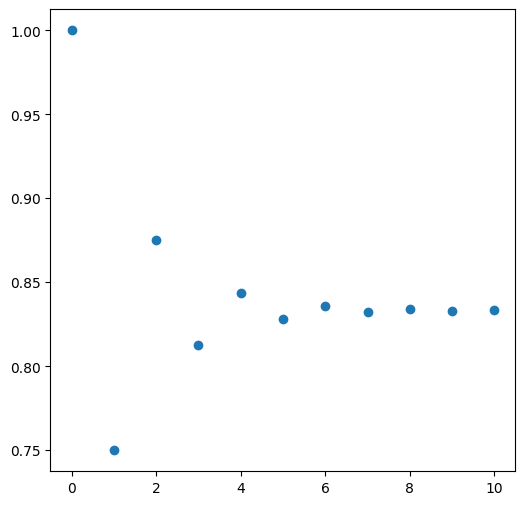

In [25]:
beta = 0
ut = 1
uts = [ut]
for t in range(10):
    utpl = utp(ut,beta)
    uts.append(utpl)
    ut = utpl

f, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(uts,'o')

And what happens if there are initially only successful agents ?

Text(0, 0.5, '$u_t$')

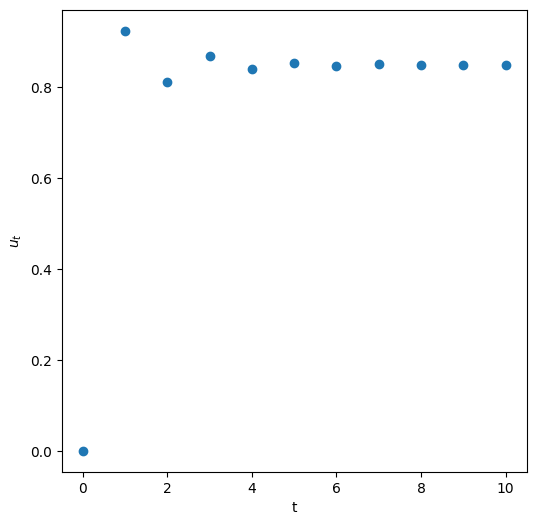

In [31]:
beta = 0.5
ut = 0
uts = [ut]
for t in range(10):
    utpl = utp(ut, beta)
    uts.append(utpl)
    ut = utpl

f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(uts, "o")
ax.set_xlabel("t")
ax.set_ylabel(r"$u_t$")